In [22]:
import numpy as np
import chess.pgn 
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sb
import re

In [23]:
# used systematic sampling
f = open("caissabase_files/caissabase_file.pgn", encoding = 'ISO-8859-1')
result = {}
i = 0
while True:
    i+=1
    game = chess.pgn.read_game(f)
    for skip in range(5000):
        chess.pgn.skip_game(f)

    if game is None:
        break

    # if game.headers['Opening'] == None:
    #     chess.pgn.skip_game(f)
    
    if game.headers['Date'] < '1900.01.01':
        break

    
    headers = dict(game.headers)
    headers["moves"] = game.board().variation_san(game.mainline_moves())

    result["Game {}".format(i)] = headers

result

{'Game 1': {'Event': '47th ch-Bangahbandhu 2022',
  'Site': 'Dhaka BAN',
  'Date': '2022.12.19',
  'Round': '5.6',
  'White': 'Hossain, Enam',
  'Black': 'Murshed, N',
  'Result': '1/2-1/2',
  'BlackElo': '2419',
  'BlackFideId': '10200010',
  'BlackTitle': 'GM',
  'ECO': 'B36f',
  'EventDate': '2022.12.15',
  'Opening': 'Sicilian',
  'Variation': 'accelerated fianchetto, Gurgenidze variation',
  'WhiteElo': '2372',
  'WhiteFideId': '10200649',
  'WhiteTitle': 'GM',
  'moves': '1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 g6 5. c4 Nf6 6. Nc3 Nxd4 7. Qxd4 d6 8. f3 Bg7 9. Be3 O-O 10. Qd2 Be6 11. Rc1 Qa5 12. b3 Rfc8 13. Bd3 Nd7 14. Nb5 Qxd2+ 15. Kxd2 Nc5 16. Be2 a6 17. Nd4 Bd7 18. Rhd1 Ne6 19. Nxe6'},
 'Game 2': {'Event': 'Titled Tue 13th Dec Early',
  'Site': 'chess.com INT',
  'Date': '2022.12.13',
  'Round': '4',
  'White': 'Khamdamova, Afruza',
  'Black': 'Tsatsalashvili, K',
  'Result': '0-1',
  'BlackElo': '2303',
  'BlackFideId': '13603434',
  'BlackTitle': 'WGM',
  'ECO': 'B51d',
  'Eve

In [3]:
caissa_df = pd.DataFrame.from_dict(result)
caissa_df = caissa_df.transpose()
list_of_dates = caissa_df.columns.values.tolist()

In [4]:
caissa_df['Date'] = caissa_df['Date'].apply(lambda x: x.replace("??.??", "01.01"))
caissa_df['Date'] = caissa_df['Date'].str.replace('.','-')


/tmp/ipykernel_791/1249994737.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  caissa_df['Date'] = caissa_df['Date'].str.replace('.','-')


In [5]:
list_of_dates
caissa_df = caissa_df.drop(['Event', 'Site', 'White', 'Black', 'BlackElo', 'BlackFideId', 'ECO', 'EventDate', 'WhiteElo', 'WhiteFideId', 'EventType', 'BlackTeam', 'WhiteTeam'], axis=1)
caissa_df

,Date,Round,Result,BlackTitle,Opening,Variation,WhiteTitle,moves
Game 1,2022-12-19,5.6,1/2-1/2,GM,Sicilian,"accelerated fianchetto, Gurgenidze variation",GM,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 g6 5. c...
Game 2,2022-12-13,4,0-1,WGM,Sicilian,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",WFM,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. N...
Game 3,2022-12-08,1.18,1-0,GM,Ruy Lopez,Berlin defence,GM,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. d3 Bc5 5. Bg...
Game 4,2022-12-04,3.27,0-1,NaN,Sicilian,"dragon, classical, Richter variation",NaN,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
Game 5,2022-11-29,2,0-1,FM,Sicilian,"dragon, Yugoslav attack, 9...Bd7",FM,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
...,...,...,...,...,...,...,...,...
Game 969,1930-01-01,?,1-0,NaN,NaN,NaN,NaN,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. Bg5 Be7 5. e5 ...
Game 970,1925-01-01,1,1-0,NaN,NaN,NaN,NaN,1. d4 Nf6 2. Nf3 e6 3. Bg5 c5 4. e3 b6 5. Nc3 ...
Game 971,1920-01-01,1,1/2-1/2,NaN,NaN,NaN,NaN,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qa5 4. Bc4 Nf6 5....
Game 972,1910-01-01,11,1-0,NaN,NaN,NaN,NaN,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...


In [6]:
caissa_df.reset_index()

,index,Date,Round,Result,BlackTitle,Opening,Variation,WhiteTitle,moves
0,Game 1,2022-12-19,5.6,1/2-1/2,GM,Sicilian,"accelerated fianchetto, Gurgenidze variation",GM,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 g6 5. c...
1,Game 2,2022-12-13,4,0-1,WGM,Sicilian,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",WFM,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. N...
2,Game 3,2022-12-08,1.18,1-0,GM,Ruy Lopez,Berlin defence,GM,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. d3 Bc5 5. Bg...
3,Game 4,2022-12-04,3.27,0-1,NaN,Sicilian,"dragon, classical, Richter variation",NaN,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
4,Game 5,2022-11-29,2,0-1,FM,Sicilian,"dragon, Yugoslav attack, 9...Bd7",FM,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
...,...,...,...,...,...,...,...,...,...
968,Game 969,1930-01-01,?,1-0,NaN,NaN,NaN,NaN,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. Bg5 Be7 5. e5 ...
969,Game 970,1925-01-01,1,1-0,NaN,NaN,NaN,NaN,1. d4 Nf6 2. Nf3 e6 3. Bg5 c5 4. e3 b6 5. Nc3 ...
970,Game 971,1920-01-01,1,1/2-1/2,NaN,NaN,NaN,NaN,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qa5 4. Bc4 Nf6 5....
971,Game 972,1910-01-01,11,1-0,NaN,NaN,NaN,NaN,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...


In [7]:
caissa_df['Result'].value_counts()

1-0        396
0-1        306
1/2-1/2    271
Name: Result, dtype: int64

<BarContainer object of 3 artists>

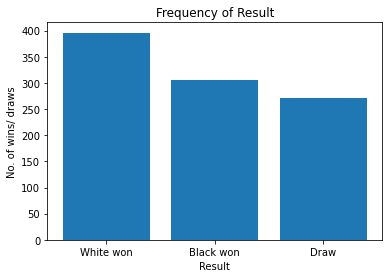

In [8]:
names = ['White won', 'Black won', 'Draw']
values = caissa_df['Result'].value_counts()
plt.xlabel('Result')
plt.ylabel('No. of wins/ draws')
plt.title('Frequency of Result')
plt.bar(names, values)

In [9]:
caissa_df_updated = caissa_df[caissa_df['Opening'].notna()]
caissa_df_updated

,Date,Round,Result,BlackTitle,Opening,Variation,WhiteTitle,moves
Game 1,2022-12-19,5.6,1/2-1/2,GM,Sicilian,"accelerated fianchetto, Gurgenidze variation",GM,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 g6 5. c...
Game 2,2022-12-13,4,0-1,WGM,Sicilian,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",WFM,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. N...
Game 3,2022-12-08,1.18,1-0,GM,Ruy Lopez,Berlin defence,GM,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. d3 Bc5 5. Bg...
Game 4,2022-12-04,3.27,0-1,NaN,Sicilian,"dragon, classical, Richter variation",NaN,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
Game 5,2022-11-29,2,0-1,FM,Sicilian,"dragon, Yugoslav attack, 9...Bd7",FM,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...
...,...,...,...,...,...,...,...,...
Game 398,2012-08-07,6.63,1-0,NaN,QGD Slav,"exchange variation, 6.Bf4 Bf5",NaN,1. Nf3 d5 2. c4 c6 3. cxd5 cxd5 4. d4 Nf6 5. N...
Game 399,2012-07-29,2.14,1/2-1/2,NaN,Blackmar-Diemer gambit,NaN,NaN,1. d4 Nf6 2. Nc3 d5 3. e4 Nxe4 4. Nxe4 dxe4 5....
Game 401,2012-07-14,1,0-1,FM,QGD Slav,4.e3,NaN,1. d4 Nf6 2. c4 c6 3. Nf3 d5 4. e3 g6 5. Nc3 B...
Game 402,2012-07-09,6.15,1-0,FM,Levitsky attack (Queen's bishop attack),NaN,FM,1. d4 d5 2. Bg5 Nd7 3. c3 Ngf6 4. Nd2 e6 5. Ng...


In [10]:
import re 
    
def seperate_moves(moves):
    white_moves = []
    black_moves = []
    
    arr_of_moves = moves.split(' ')
    for i in range(0, len(arr_of_moves)):
        match = re.match(r"([0-9]+).", arr_of_moves[i], re.I)
        if match:
            arr_of_moves[i] = arr_of_moves[i][:-1]
            white_moves.append(arr_of_moves[i+1])
            if i+2 < len(arr_of_moves):
                black_moves.append(arr_of_moves[i+2])

    white_moves=" ".join([str(i) for i in white_moves])
    black_moves=" ".join([str(i) for i in black_moves])
    return white_moves, black_moves

def seperate_moves_series(series):
    white_series = []
    black_series = []

    for value in series:
        white_result, black_result = seperate_moves(value)
        white_series.append(white_result)
        black_series.append(black_result)
    
    return white_series, black_series
        

caissa_df['White Moves'], caissa_df['Black Moves'] = pd.Series(seperate_moves_series(caissa_df['moves'])[0]).values, pd.Series(seperate_moves_series(caissa_df['moves'])[1]).values
caissa_df

,Date,Round,Result,BlackTitle,Opening,Variation,WhiteTitle,moves,White Moves,Black Moves
Game 1,2022-12-19,5.6,1/2-1/2,GM,Sicilian,"accelerated fianchetto, Gurgenidze variation",GM,1. e4 c5 2. Nf3 Nc6 3. d4 cxd4 4. Nxd4 g6 5. c...,e4 Nf3 d4 Nxd4 c4 Nc3 Qxd4 f3 Be3 Qd2 Rc1 b3 B...,c5 Nc6 cxd4 g6 Nf6 Nxd4 d6 Bg7 O-O Be6 Qa5 Rfc...
Game 2,2022-12-13,4,0-1,WGM,Sicilian,"Canal-Sokolsky (Nimzovich-Rossolimo, Moscow) a...",WFM,1. e4 c5 2. Nf3 d6 3. Bb5+ Nd7 4. O-O Nf6 5. N...,e4 Nf3 Bb5+ O-O Nc3 Bxd7+ d4 Qxd4 Bg5 Nd5 Bxf6...,c5 d6 Nd7 Nf6 a6 Bxd7 cxd4 g6 Bg7 O-O exf6 f5 ...
Game 3,2022-12-08,1.18,1-0,GM,Ruy Lopez,Berlin defence,GM,1. e4 e5 2. Nf3 Nc6 3. Bb5 Nf6 4. d3 Bc5 5. Bg...,e4 Nf3 Bb5 d3 Bg5 Bh4 O-O d4 Nc3 Nxd4 Qxd4 Bd3...,e5 Nc6 Nf6 Bc5 h6 Be7 d6 O-O Nxd4 exd4 c6 Qb6 ...
Game 4,2022-12-04,3.27,0-1,NaN,Sicilian,"dragon, classical, Richter variation",NaN,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,e4 Nf3 d4 Nxd4 Nc3 Be3 Be2 O-O Qd2 Nxc6 e5 f4 ...,c5 d6 cxd4 Nf6 g6 Bg7 O-O Nc6 d5 bxc6 Nd7 Qc7 ...
Game 5,2022-11-29,2,0-1,FM,Sicilian,"dragon, Yugoslav attack, 9...Bd7",FM,1. e4 c5 2. Nf3 d6 3. d4 cxd4 4. Nxd4 Nf6 5. N...,e4 Nf3 d4 Nxd4 Nc3 Be3 f3 Qd2 Bc4 Bb3 g4 Bxd4 ...,c5 d6 cxd4 Nf6 g6 Bg7 O-O Nc6 Bd7 Rc8 Nxd4 b5 ...
...,...,...,...,...,...,...,...,...,...,...
Game 969,1930-01-01,?,1-0,NaN,NaN,NaN,NaN,1. e4 e6 2. d4 d5 3. Nc3 Nf6 4. Bg5 Be7 5. e5 ...,e4 d4 Nc3 Bg5 e5 h4 Bd3 Qh5+ Bxg6+ Qxh8+ hxg5 ...,e6 d5 Nf6 Be7 Nfd7 f6 fxg5 g6 hxg6 Nf8 c5 cxd4...
Game 970,1925-01-01,1,1-0,NaN,NaN,NaN,NaN,1. d4 Nf6 2. Nf3 e6 3. Bg5 c5 4. e3 b6 5. Nc3 ...,d4 Nf3 Bg5 e3 Nc3 d5 Bxf6 e4 Be2 O-O Qd2 Rae1 ...,Nf6 e6 c5 b6 Bb7 h6 Qxf6 a6 d6 Nd7 Be7 O-O Rfd...
Game 971,1920-01-01,1,1/2-1/2,NaN,NaN,NaN,NaN,1. e4 d5 2. exd5 Qxd5 3. Nc3 Qa5 4. Bc4 Nf6 5....,e4 exd5 Nc3 Bc4 d3 Bd2 Nge2 h3 Nxe2 O-O c3 Qb3...,d5 Qxd5 Qa5 Nf6 Nc6 e5 Bg4 Bxe2 Qb6 Bc5 a5 Qxb...
Game 972,1910-01-01,11,1-0,NaN,NaN,NaN,NaN,1. e4 e5 2. Nf3 Nc6 3. Bb5 a6 4. Ba4 Nf6 5. O-...,e4 Nf3 Bb5 Ba4 O-O d4 Bb3 a4 Nxd4 axb5 c3 cxd4...,e5 Nc6 a6 Nf6 Nxe4 b5 d5 Nxd4 exd4 Bc5 O-O Bb6...


In [11]:
# extracting popular moves leading to a win
def get_opening_moves(list_of_moves):
    new_list_of_moves = []
    for moves in list_of_moves:
        moves = moves.split()
        new_list_of_moves.append(' '.join(moves[0:4]))
    return new_list_of_moves

win_moves = []
for idx, move in enumerate(caissa_df['Result']):
    if move == '1-0':
        win_moves.append(caissa_df['White Moves'][idx])
    elif move == '0-1' :
        win_moves.append(caissa_df['Black Moves'][idx])

win_moves = get_opening_moves(win_moves)

In [12]:
win_moves_series = pd.Series(win_moves)
win_moves_df = win_moves_series.value_counts().rename_axis('Moves').reset_index(name='counts')
win_moves_df = win_moves_df[win_moves_df.counts > 3]
win_moves_df

,Moves,counts
0,e4 Nf3 d4 Nxd4,41
1,d4 c4 Nc3 e4,17
2,c5 d6 cxd4 Nf6,14
3,Nf6 g6 Bg7 O-O,11
4,c5 Nc6 cxd4 Nf6,10
5,e4 Nf3 Bb5 Ba4,10
6,d4 c4 Nc3 cxd5,9
7,d4 c4 Nc3 Nf3,9
8,d4 c4 Nf3 g3,9
9,Nf3 g3 Bg2 O-O,8


Text(0, 0.5, 'Number of Times Used')

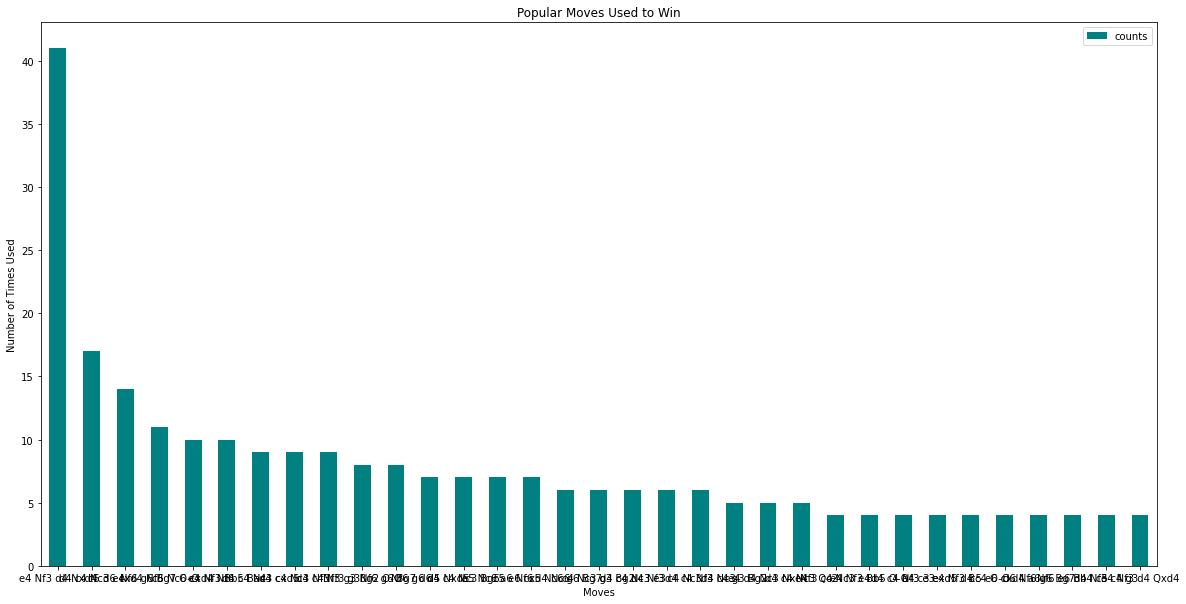

In [13]:
ax = win_moves_df.plot.bar(x='Moves', y='counts', rot=0, figsize=(20,10), title='Popular Moves Used to Win', color='teal')
ax.set_xlabel('Moves')
ax.set_ylabel('Number of Times Used')

In [14]:
openings = caissa_df['Opening']
openings = openings.dropna()
temp = openings.value_counts()>4
openings = caissa_df[caissa_df['Opening'].isin(temp[temp].index.get_level_values(0).values)]
openings = openings['Opening']

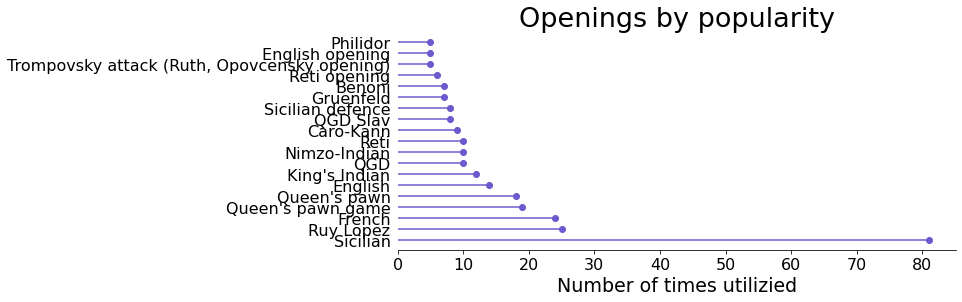

In [15]:
names = openings.unique().astype(str)
values = openings.value_counts()
plt.figure(figsize=(10,4))
plt.hlines(y=names, xmin=0, xmax=values, color='slateblue')
plt.plot(values, names, 'o', color='slateblue')
plt.title('Openings by popularity', fontsize=27)
plt.xlabel('Number of times utilizied', fontsize=19)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlim(0, None)
plt.tick_params(left=False)
sb.despine(left=True)
plt.show()

In [16]:
def squares_dictionary_maker():
    dictionary = {}
    for i in range(8):
        for j in range(8):
            square = chr(97+i) + str(j+1)
            dictionary[square] = 0
            
    return dictionary

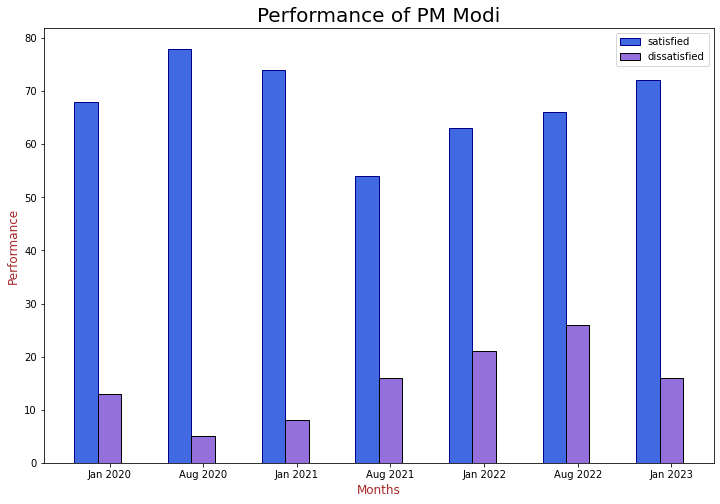

In [21]:
# fixing bad visualization 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
months = ['Jan 2020', 'Aug 2020', 'Jan 2021', 'Aug 2021', 'Jan 2022', 'Aug 2022', 'Jan 2023']
performance_1 = [68, 78, 74, 54, 63, 66, 72]
performance_2 = [13, 5, 8, 16, 21, 26, 16]

br1 = np.arange(len(performance_1))
br2 = [x + barWidth for x in br1]

plt.bar(br1, performance_1, color ='royalblue', width = barWidth,
        edgecolor ='darkblue', label ='satisfied')
plt.bar(br2, performance_2, color ='mediumpurple', width = barWidth,
        edgecolor ='black', label ='dissatisfied')

plt.title("Performance of PM Modi",  fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Black'})
plt.xlabel("Months", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'})
plt.ylabel("Performance", fontdict={'fontsize': 12, 'fontweight' : 5, 'color' : 'Brown'} )
plt.xticks([r + barWidth for r in range(len(performance_1))],
        months)
plt.legend()
